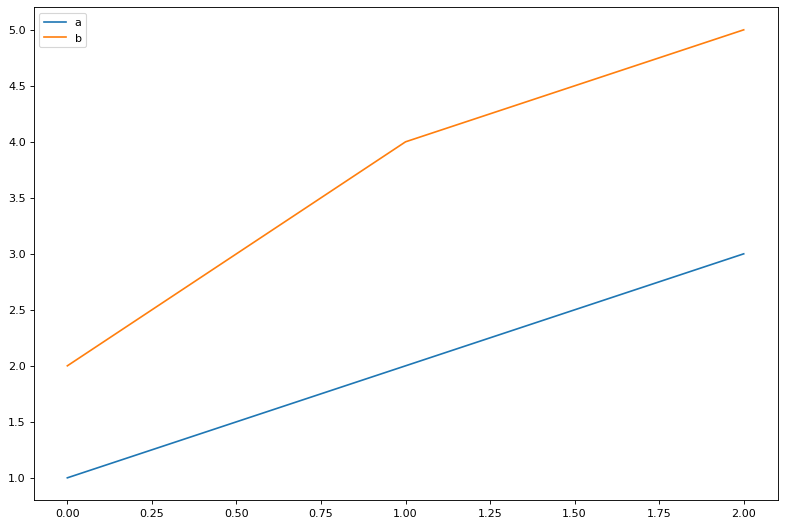

In [5]:
import matplotlib.pyplot as plt

a = [1, 2, 3]
b = [2, 4, 5]

fig, ax1 = plt.subplots(1, 1, figsize=(12, 8), dpi=80)
ax1.plot(a, label="a")
ax1.plot(b, label="b")
plt.legend()
plt.show()